# PDF distribution

## Example 01

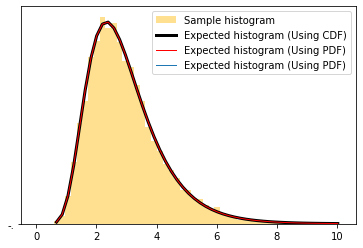

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Suppose [a, b] is one of the x intervals of the histogram. For a random
# sample of size n, the expected number of samples in the interval is
# (cdf(b) - cdf(a)) * n 
# where cdf(x) is the cumulative distribution function. To plot the expected
# histogram, you'll compute that value for each bin

# Generate log-normal distributed set of samples
np.random.seed(1234)
samples = np.random.lognormal(mean=1., sigma=.4, size=10000)

# Make a fit to the sample
shape, loc, scale = scipy.stats.lognorm.fit(samples, floc=0)

# Create the histogram plot using matplotlib.
# The first two values in the tuple returned by hist are the number of samples 
# in each bin and the values of the histograms's bin edges. Counts has length
# num_bins, and edges has length num_bins + 1
num_bins = 50
clr = "#FFE090"
counts, edges, patches = plt.hist(samples, bins=num_bins, color=clr, label="Sample histogram")

# Create an array of length num_bins containing the center of each bin.
centers = 0.5 * (edges[:-1] + edges[1:])

# Compute the CDF at the edges. Then prob, the array of differences, is the 
# probability of sample being in the corresponding bin.
cdf = scipy.stats.lognorm.cdf(edges, shape, loc=loc, scale=scale)
prob = np.diff(cdf)

plt.plot(centers, samples.size * prob, "k-", linewidth=3, label="Expected histogram (Using CDF)")

# prob can also be approximated using the PDF at the centers multiplied by
# the width of the bin:
p = scipy.stats.lognorm.pdf(centers, shape, loc=loc, scale=scale)
prob2 = p*(edges[1] - edges[0])
plt.plot(centers, samples.size * prob, "r", "-.", linewidth=1, label="Expected histogram (Using PDF)")

# Since the PDF is the derivative of the CDF,
# cdf(b) - cdf(a) = pdf(m) * (b - a)
# where m is the midpoint of the interval [a, b]

plt.legend()
plt.show()

## Example 02

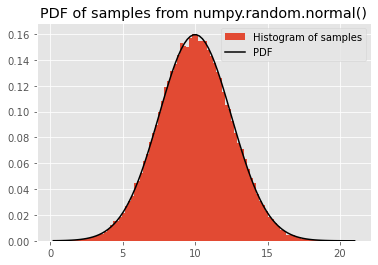

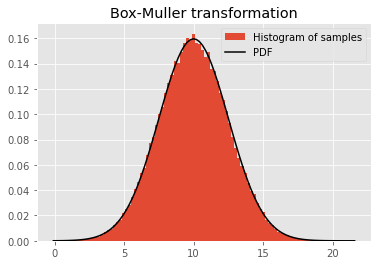

In [2]:
import numpy as np

mu = 10; sigma = 2.5; # mean = 10, deviation = 2.5
L = 100000 # length of the random vector

# Random samples generated using numpy.random.normal()
samples_normal = np.random.normal(loc=mu, scale=sigma, size=(L, 1))
# generate normally distributted samples

# For plotting
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use("ggplot")

fig, ax0 = plt.subplots(ncols=1, nrows=1) # creating plot axes
(values, bins, _) = ax0.hist(samples_normal, bins=100, density=True, label="Histogram of samples") # compute and plot histogram, return the computed values and bins

from scipy import stats
bin_centers = 0.5 * (bins[1:] + bins[: -1])
pdf = stats.norm.pdf(x=bin_centers, loc=mu, scale=sigma) # compute probability density function
ax0.plot(bin_centers, pdf, label="PDF", color="black") # plot PDF
ax0.legend() # legend entries
ax0.set_title("PDF of samples from numpy.random.normal()")

# Use Box-Muller transformation
# Generate a pair of normally distributed random numbers (Z1, Z2)
# by transforming a pair of uniformly distributed independent random samples (U1, U2)
# a = sqrt(-2 ln U1), b = 2 pi U2
# Z1 = a sin(b), Z2 = a cos(b)

# Samples generated using Box-Muller transformation
from numpy.random import uniform
U1 = np.random.uniform(low=0, high=1, size=(L, 1)) # uniformaly distributed random numbers U(0, 1)
U2 = np.random.uniform(low=0, high=1, size=(L, 1)) # uniformaly distributed random numbers U(0, 1)

a = np.sqrt(-2 * np.log(U1))
b = 2 * np.pi * U2

Z = a * np.cos(b) # Standard normal distributed numbers
samples_box_muller = Z * sigma + mu # Normal distribution with mean and sigma

# Plotting
fig, ax1 = plt.subplots(ncols=1, nrows=1) # creating plot axes
(values, bins, _) = ax1.hist(samples_box_muller, bins=100, density=True, label="Histogram of samples") # Plot histogram
bin_centers = 0.5 * (bins[1:] + bins[:-1])
pdf = stats.norm.pdf(x=bin_centers, loc=mu, scale=sigma) # compute probability density function
ax1.plot(bin_centers, pdf, label="PDF", color="black") # plot PDF
ax1.legend() # legend entries
ax1.set_title("Box-Muller transformation")

plt.show()

## Example 03

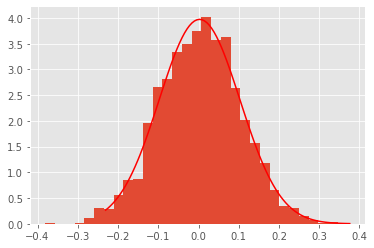

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


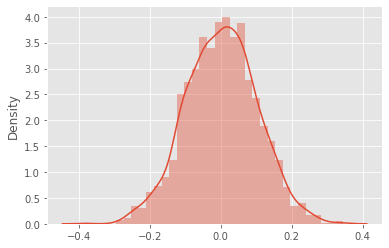

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Generate normaly distribution random sample
mu_true = 0
sigma_true = 0.1
s = np.random.normal(mu_true, sigma_true, 2000)

# Fit normal distribution to the data and calculate PDF
mu, sigma = stats.norm.fit(s)
points = np.linspace(stats.norm.ppf(0.01, loc=mu, scale=sigma),
                     stats.norm.ppf(0.9999, loc=mu, scale=sigma), 100)
# ppf() 是 cdf() 的反函數
# cdf() 是給定 x 求在 x 處的累計機率
# ppf() 是給定累計機率，求對應的 x 數值
pdf = stats.norm.pdf(points, loc=mu, scale=sigma)

# Display fitted PDF and the data histogram
plt.hist(s, 30, density=True)
plt.plot(points, pdf, color="r")
plt.show()

import seaborn as sns
ax = sns.distplot(s)